In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv(r"D:\HR\train_employee_data.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Preprocessing

In [3]:
df.replace('?',np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
mode_edu = df['education'].value_counts().idxmax()
df['education'].replace(np.nan, mode_edu, inplace = True)

mean_rating = df['previous_year_rating'].mean()
df['previous_year_rating'].replace(np.nan, round(mean_rating), inplace = True)

df.drop(['employee_id'], axis = 1, inplace = True)

print('mean previous_year_rating', round(mean_rating))
print(df.info())

mean previous_year_rating 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB
None


In [22]:
df['is_promoted']=df['is_promoted'].astype('object')
df.describe(include='all')

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50140.0
mean,4.972796,15.428970,0.559316,0.702379,0.868158,0.125301,0.580065,0.660896,0.158527,0.351974,0.023172,0.640270,NaN
std,2.506046,8.764954,0.889452,0.457216,0.980713,0.060926,0.127669,0.242954,0.115273,0.477590,0.150450,0.135066,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.333333,0.200000,0.027027,0.000000,0.000000,0.393939,NaN
25%,4.000000,11.000000,0.000000,0.000000,0.000000,0.100000,0.483333,0.600000,0.081081,0.000000,0.000000,0.515152,NaN
50%,5.000000,14.000000,0.000000,1.000000,0.000000,0.100000,0.550000,0.600000,0.135135,0.000000,0.000000,0.606061,NaN
75%,7.000000,21.000000,2.000000,1.000000,2.000000,0.100000,0.650000,0.800000,0.189189,1.000000,0.000000,0.767677,NaN


In [23]:
# Data Normalization
df['is_promoted']=df['is_promoted'].astype('int64')
for i in df.select_dtypes(include='number').columns:
    df[i]=df[i]/df[i].max()
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.875,0.939394,1.0,0.0,1.0,0.1,0.583333,1.0,0.216216,1.0,0.0,0.494949,0.0
1,0.500,0.424242,0.0,1.0,0.0,0.1,0.500000,1.0,0.108108,0.0,0.0,0.606061,0.0
2,0.875,0.303030,0.0,1.0,1.0,0.1,0.566667,0.6,0.189189,0.0,0.0,0.505051,0.0
3,0.875,0.454545,0.0,1.0,0.0,0.2,0.650000,0.2,0.270270,0.0,0.0,0.505051,0.0
4,1.000,0.545455,0.0,1.0,0.0,0.1,0.750000,0.6,0.054054,0.0,0.0,0.737374,0.0


# EDA

(0, 1.0333333333333334)

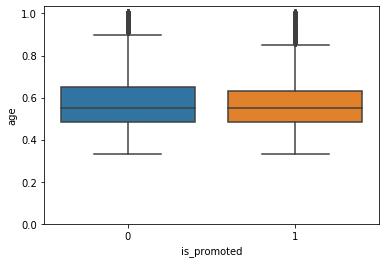

In [7]:
sns.boxplot(x='is_promoted', y='age', data=df)
plt.ylim(0,)

(0, 1.0486486486486486)

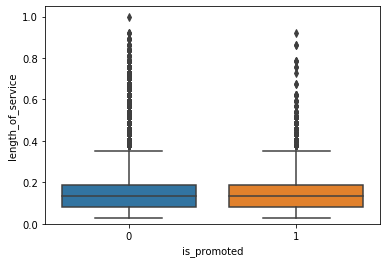

In [8]:
sns.boxplot(x='is_promoted', y='length_of_service', data=df)
plt.ylim(0,)

(0, 1.0303030303030303)

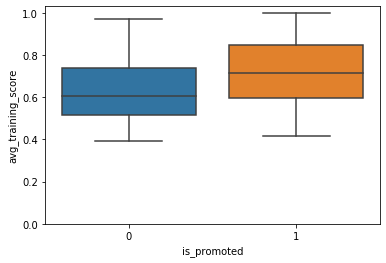

In [9]:
sns.boxplot(x='is_promoted', y='avg_training_score', data=df)
plt.ylim(0,)

(0, 1.04)

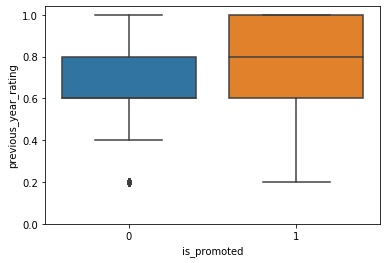

In [10]:
sns.boxplot(x='is_promoted', y='previous_year_rating', data=df)
plt.ylim(0,)

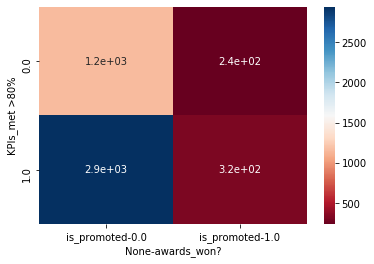

In [11]:
df_grouped3 = df[['KPIs_met >80%', 'awards_won?','is_promoted']]
grouped3 = df_grouped3.groupby(['KPIs_met >80%', 'awards_won?'], as_index=False).sum()
grouped_pivot3 = grouped3.pivot(index = 'KPIs_met >80%', columns = 'awards_won?')
sns.heatmap(grouped_pivot3, annot=True, cmap= 'RdBu')

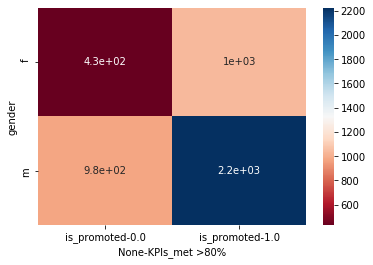

In [12]:
# heatmap of gender and KPI, to show which gender or KPI have a lot of promotions

df_group2 = df[['gender','KPIs_met >80%', 'is_promoted']]
grouped2 = df_group2.groupby(['gender','KPIs_met >80%'], as_index=False).sum()
grouped_pivot2 = grouped2.pivot(index = 'gender', columns='KPIs_met >80%')

sns.heatmap(grouped_pivot2, annot = True, cmap = 'RdBu')

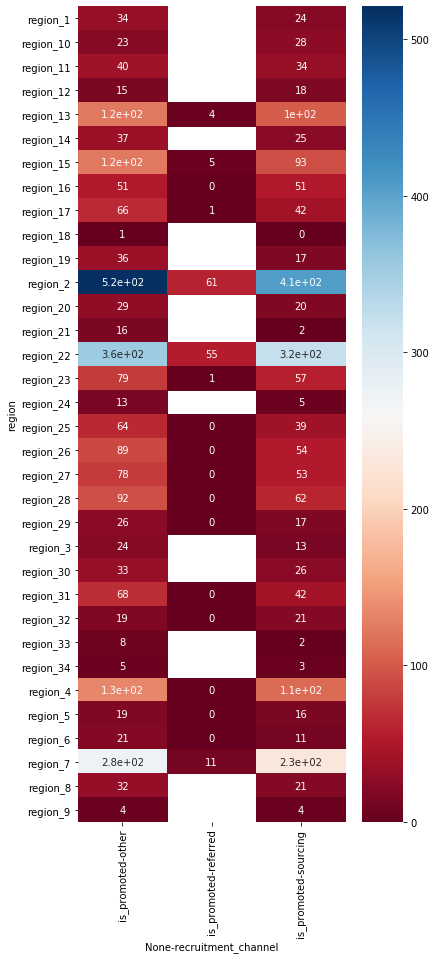

In [13]:
# heatmap of region and channel, to show which region and channel have a lot of promotions

df_group1 = df[['region','recruitment_channel', 'is_promoted']]
grouped1 = df_group1.groupby(['region','recruitment_channel'], as_index=False).sum()
grouped_pivot1 = grouped1.pivot(index = 'region', columns = 'recruitment_channel')

plt.figure(figsize = (6,15))
sns.heatmap(grouped_pivot1, annot = True, cmap = 'RdBu')

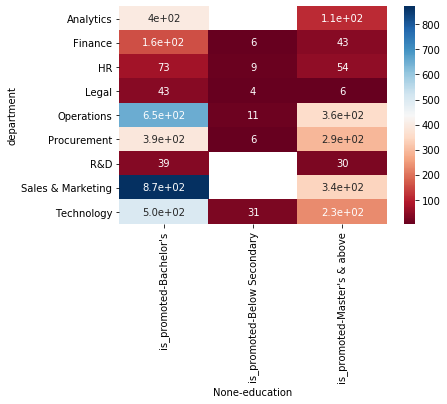

In [14]:
# heatmap of department and education, to show which department and education have a lot of promotion

df_group = df[['department','education','is_promoted']]
grouped = df_group.groupby(['department','education'],as_index=False).sum()
grouped_pivot = grouped.pivot(index = 'department', columns = 'education')
sns.heatmap(grouped_pivot, annot = True, cmap = 'RdBu')

In [18]:
df.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,0.1,0.583333,1.0,0.216216,1.0,0.0,0.494949,0
1,Operations,region_22,Bachelor's,m,other,0.1,0.500000,1.0,0.108108,0.0,0.0,0.606061,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,0.1,0.566667,0.6,0.189189,0.0,0.0,0.505051,0
3,Sales & Marketing,region_23,Bachelor's,m,other,0.2,0.650000,0.2,0.270270,0.0,0.0,0.505051,0
4,Technology,region_26,Bachelor's,m,other,0.1,0.750000,0.6,0.054054,0.0,0.0,0.737374,0


# Model

## 1. Logistic Regression

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the 'Activity' column
le = LabelEncoder()
df['recruitment_channel'] = le.fit_transform(df['recruitment_channel'])
df['gender'] = le.fit_transform(df['gender'])
df['education'] = le.fit_transform(df['education'])
df['region'] = le.fit_transform(df['region'])
df['department'] = le.fit_transform(df['department'])

# Separate features and target
X = df[['recruitment_channel', 'gender', 'education', 'region', 'department', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']]
y = df['is_promoted']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Model Evaluation

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9196314541142128
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10054
         1.0       0.65      0.06      0.12       908

    accuracy                           0.92     10962
   macro avg       0.79      0.53      0.54     10962
weighted avg       0.90      0.92      0.89     10962

Confusion Matrix:
 [[10023    31]
 [  850    58]]


# 2. Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9151614668856048
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     10054
         1.0       0.46      0.13      0.20       908

    accuracy                           0.92     10962
   macro avg       0.69      0.56      0.58     10962
weighted avg       0.89      0.92      0.89     10962

Confusion Matrix:
 [[9915  139]
 [ 791  117]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9059478197409232
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10054
         1.0       0.32      0.12      0.17       908

    accuracy                           0.91     10962
   macro avg       0.62      0.55      0.56     10962
weighted avg       0.87      0.91      0.89     10962

Confusion Matrix:
 [[9825  229]
 [ 802  106]]
